<a href="https://colab.research.google.com/github/peteray-dev/Fraud_Detection_Transactions/blob/master/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
!kaggle datasets download orogunadebola/credit-card-transaction-dataset-fraud-detection


Dataset URL: https://www.kaggle.com/datasets/orogunadebola/credit-card-transaction-dataset-fraud-detection
License(s): unknown
100% 1.48G/1.48G [00:57<00:00, 28.9MB/s]
100% 1.48G/1.48G [00:57<00:00, 27.7MB/s]


In [3]:
! mkdir fraud_detection
! unzip /content/credit-card-transaction-dataset-fraud-detection.zip -d fraud_detection

Archive:  /content/credit-card-transaction-dataset-fraud-detection.zip
  inflating: fraud_detection/data.csv  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

In [5]:
df = pd.read_csv('/content/fraud_detection/data.csv')

In [6]:
df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,customer_avg_amout_1_day,customer_avg_amount_7_day,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day
0,024-79-2449,30417925130692,Felicia,Gomez,F,486 Benson Stravenue,Rockford,IL,61107,42.2786,...,4.01,18.27,6.97,4824.23,73065.81,141799.95,4,13,20,14
1,269-54-1394,4224979584238239,Jeffrey,Mathews,M,5430 Leslie Flat Suite 854,Ceres,CA,95307,37.5833,...,88.83,77.27,8.06,3243.55,51496.77,1093950.50,3,10,11,28
2,527-16-1817,4056555304074394,Christina,Ellis,F,75933 Harvey Via Apt. 423,Buffalo,NY,14224,42.8371,...,66.96,67.47,43.41,4242.22,26384.49,1005859.33,6,14,23,48
3,314-98-4472,6011544296258081,Steven,Murphy,M,268 Anderson Valley Apt. 958,Mansfield Center,CT,6250,41.7698,...,15.32,58.22,52.05,4303.16,3476.36,226662.34,3,11,14,14
4,390-83-9961,374917808855764,Cynthia,Martinez,F,53164 Deborah Square Apt. 739,Anaheim,CA,92804,33.8186,...,28.81,44.64,24.65,2424.13,32215.14,36989.60,2,13,16,20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580255 entries, 0 to 8580254
Data columns (total 44 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ssn                         object 
 1   cc_num                      int64  
 2   first                       object 
 3   last                        object 
 4   gender                      object 
 5   street                      object 
 6   city                        object 
 7   state                       object 
 8   zip                         int64  
 9   lat                         float64
 10  long                        float64
 11  city_pop                    int64  
 12  job                         object 
 13  dob                         object 
 14  acct_num                    int64  
 15  profile                     object 
 16  trans_num                   object 
 17  trans_date                  object 
 18  trans_time                  object 
 19  unix_time            

In [8]:
df.head(1).transpose()

,0
ssn,024-79-2449
cc_num,30417925130692
first,Felicia
last,Gomez
gender,F
street,486 Benson Stravenue
city,Rockford
state,IL
zip,61107
lat,42.2786


In [9]:
df.isnull().sum()

,0
ssn,0
cc_num,0
first,0
last,0
gender,0
street,0
city,0
state,0
zip,0
lat,0


In [10]:
for i in df.columns:
  print(i, df[i].nunique())

ssn 9968
cc_num 9968
first 663
last 986
gender 2
street 9968
city 3694
state 51
zip 6822
lat 6676
long 6743
city_pop 4356
job 639
dob 8188
acct_num 9968
profile 12
trans_num 8580255
trans_date 366
trans_time 86400
unix_time 6699491
category 14
amt 119685
is_fraud 2
merchant 693
merch_lat 6756782
merch_long 7695067
customer_num_trans_1_day 7
customer_num_trans_7_day 12
customer_num_trans_30_day 17
trans_time_secs 86399
trans_time_hrs 24
trans_time_is_night 2
trans_time_day 7
trans_date_is_weekend 2
customer_avg_amout_1_day 8901
customer_avg_amount_7_day 8901
customer_avg_amount_30_day 6901
merchant_num_trans_1_day 490001
merchant_num_trans_7_day 5739184
merchant_num_trans_30_day 8250846
merchant_risk_1_day 8
merchant_risk_7_day 16
merchant_risk_30_day 24
merchant_risk_90_day 51


In [11]:
# Im dropping this because they arent useful for analysis based on domain knowledge,
# ~the trans hr and sencond will be dropped becasue the time are different fro the real transaction time this may be because of the time zones where the transacion happens
# and the timestamp of the server, instead i will use the unix time stamp for analysis
df.drop(columns=['first','profile','ssn', 'cc_num','acct_num', 'merch_lat', 'merch_long', 'zip', 'street','trans_time_secs', 'trans_time_hrs' ,'last'],  inplace=True)

In [12]:
df['dob'] = pd.to_datetime(df['dob'])
df['trans_date'] = pd.to_datetime(df['trans_date'])

In [13]:
# get the age out of dob
import datetime

def calculate_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['dob'].apply(calculate_age)

In [14]:
df.drop(columns='dob', inplace=True)

In [15]:
num_col = df.select_dtypes(include=np.number).columns
cat_col = df.select_dtypes(exclude=np.number).columns

print(f"numerical columns: {num_col}")
print(f"categorical columns: {cat_col}")

numerical columns: Index(['lat', 'long', 'city_pop', 'unix_time', 'amt', 'is_fraud',
       'customer_num_trans_1_day', 'customer_num_trans_7_day',
       'customer_num_trans_30_day', 'trans_time_is_night', 'trans_time_day',
       'trans_date_is_weekend', 'customer_avg_amout_1_day',
       'customer_avg_amount_7_day', 'customer_avg_amount_30_day',
       'merchant_num_trans_1_day', 'merchant_num_trans_7_day',
       'merchant_num_trans_30_day', 'merchant_risk_1_day',
       'merchant_risk_7_day', 'merchant_risk_30_day', 'merchant_risk_90_day',
       'age'],
      dtype='object')
categorical columns: Index(['gender', 'city', 'state', 'job', 'trans_num', 'trans_date',
       'trans_time', 'category', 'merchant'],
      dtype='object')


In [16]:
# def plot_hist(df, num_col):
#   for col in num_col:
#     fig, ax = plt.subplots(figsize=(5, 3))
#     sns.histplot(data=df, x=col, ax=ax, kde=True)
#     plt.title(f'distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('count')
#     plt.show()
# numb = ['amt', 'city_pop', 'customer_num_trans_1_day', 'customer_num_trans_7_day',
#        'customer_num_trans_30_day', 'merchant_risk_1_day', 'merchant_risk_7_day', 'merchant_risk_30_day',
#        'merchant_risk_90_day', 'age']

# plot_hist(df, numb)


In [17]:
np.number

numpy.number

In [18]:


# def univariate_analysis(df, cols):
#     for col in cols:
#         fig, ax = plt.subplots(figsize=(5, 3))
#         sns.boxplot(x=df[col], ax=ax)  # Fixed axis input (x=col)
#         plt.title(f'{col} Boxplot')
#         plt.xlabel(col)
#         plt.tight_layout()
#         plt.show()

# # List of numeric columns to analyze
# numb = ['amt', 'city_pop', 'customer_num_trans_1_day', 'customer_num_trans_7_day',
#         'customer_num_trans_30_day', 'merchant_risk_1_day', 'merchant_risk_7_day',
#         'merchant_risk_30_day', 'merchant_risk_90_day', 'age']

# # Call the function
# univariate_analysis(df, numb)


In [19]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example usage for the 'amount' column
df_no_outliers = remove_outliers_iqr(df, 'amt')

In [20]:
df[df['amt']==df['amt'].max()]

,gender,city,state,lat,long,city_pop,job,trans_num,trans_date,trans_time,...,customer_avg_amount_7_day,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day,age
103050,M,Manteca,CA,37.7808,-121.2344,74232,"Engineer, mining",91fdaec63cfbdf40e4b4a9a4898de97c,2023-04-21,18:13:06,...,38.91,32.77,3103.28,41636.53,523580.34,7,12,23,27,56


In [21]:


def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example usage for the 'amount' column
df_no_outliers = remove_outliers_iqr(df, 'amt')

In [22]:
# i might not be removing outliers as seen in the amount, since this is afraud detection system
# fraudsters might want to access such huge amount of money

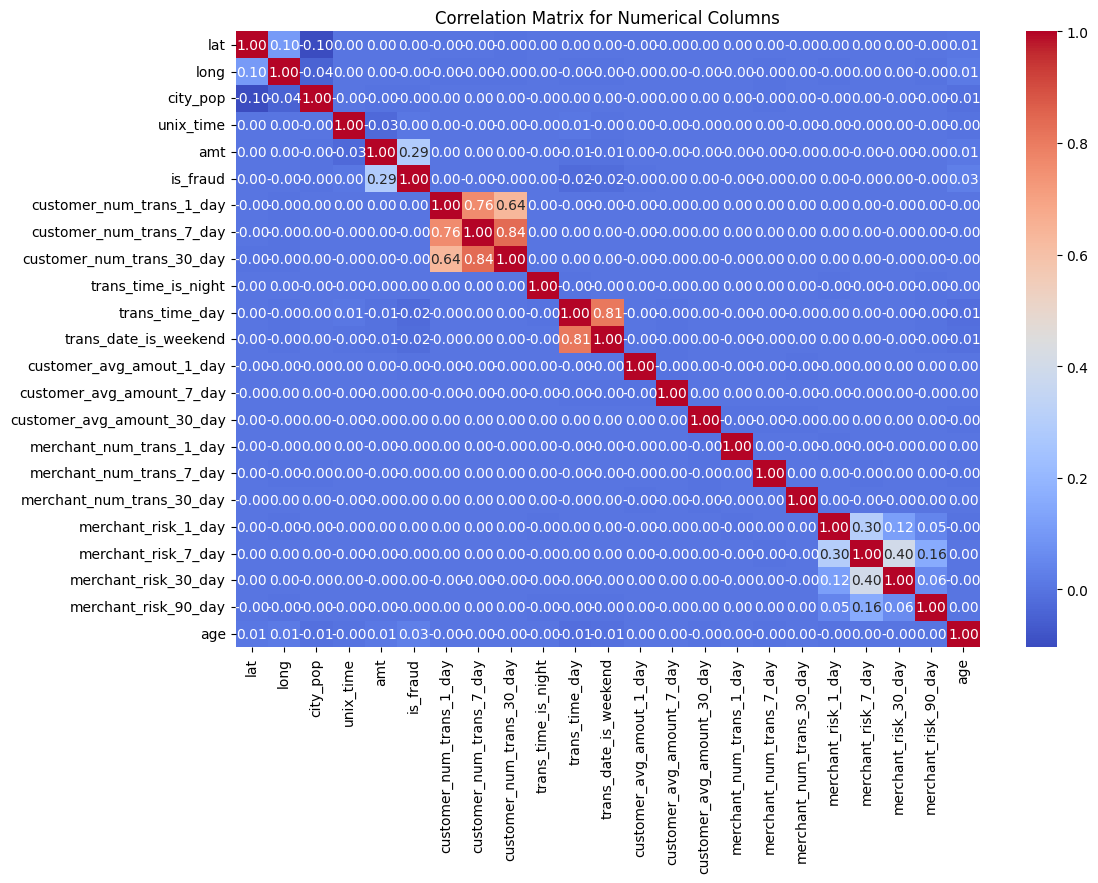

In [23]:
# Display correlation matrix for numerical columns
correlation_matrix = df[num_col].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

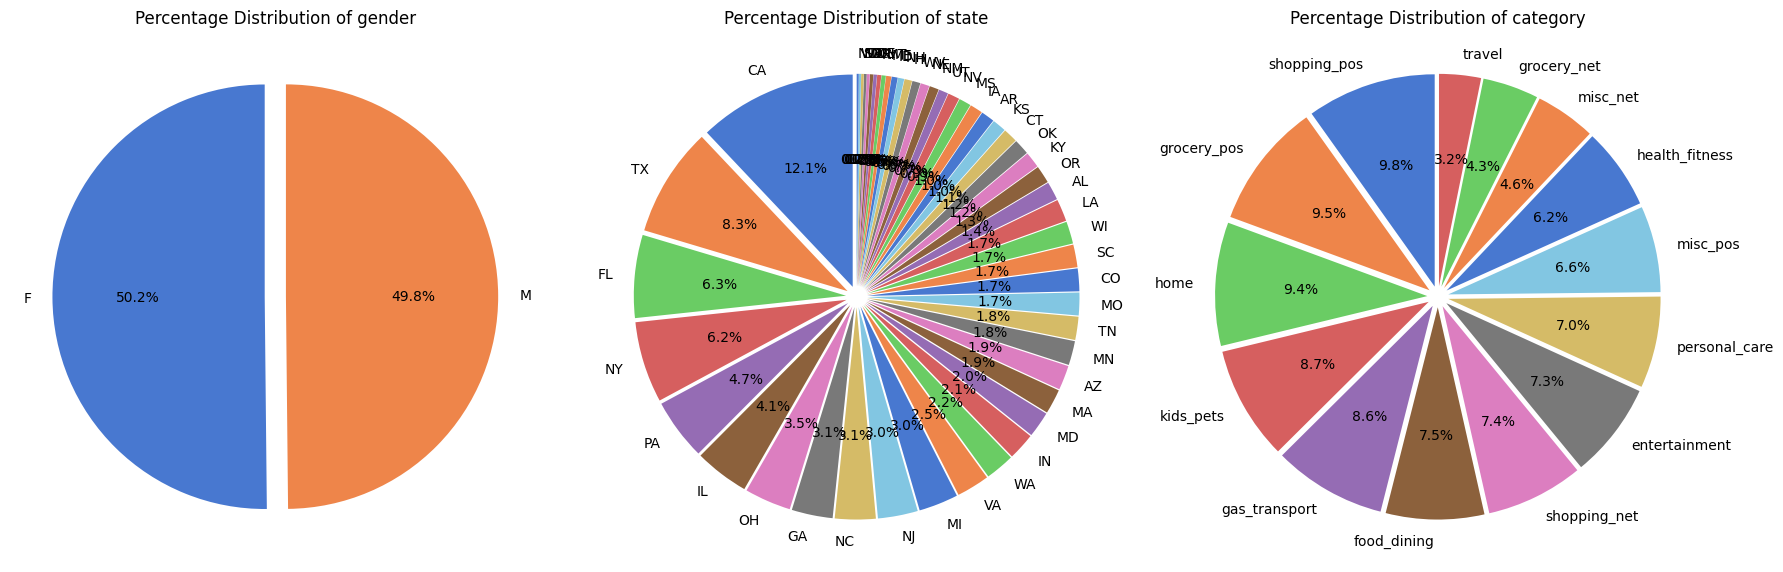

In [24]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(18, 6))

    # Loop through each column and create a pie chart
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette),
                               startangle=90, explode=[0.05] * value_counts.nunique())

        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ['gender','state','category']
plot_categorical_distributions(columns_to_plot)

In [25]:
df.groupby('merchant')['is_fraud'].value_counts().sort_index()


merchant                      is_fraud
fraud_Abbott-Rogahn           0           12317
                              1              54
fraud_Abbott-Steuber          0           11861
                              1              51
fraud_Abernathy and Sons      0           12900
                                          ...  
fraud_Ziemann-Waters          1              29
fraud_Zieme, Bode and Dooley  0           14449
                              1             138
fraud_Zulauf LLC              0           12090
                              1              44
Name: count, Length: 1386, dtype: int64

In [26]:
df.groupby('merchant')['is_fraud'].sum().sort_values(ascending=False)
# the top targetted merchant for fraud attacks

,is_fraud
merchant,
fraud_Gerlach Inc,515
fraud_Kilback LLC,511
fraud_Boyer PLC,504
fraud_Goyette Inc,494
fraud_Miller-Hauck,486
...,...
"fraud_Turcotte, Batz and Buckridge",21
"fraud_Larson, Quitzon and Spencer",21
"fraud_Rutherford, Homenick and Bergstrom",21


<Axes: xlabel='category'>

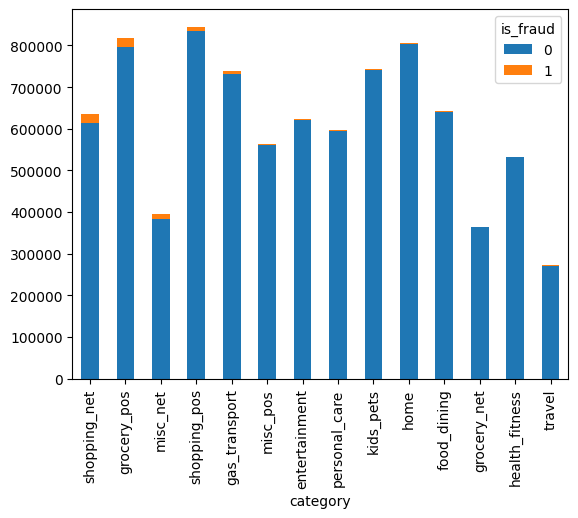

In [27]:
df.groupby('category')['is_fraud'].value_counts().unstack().sort_values(by=1, ascending=False).plot(kind='bar', stacked=True)
# understanding which category the fraud is coming more from

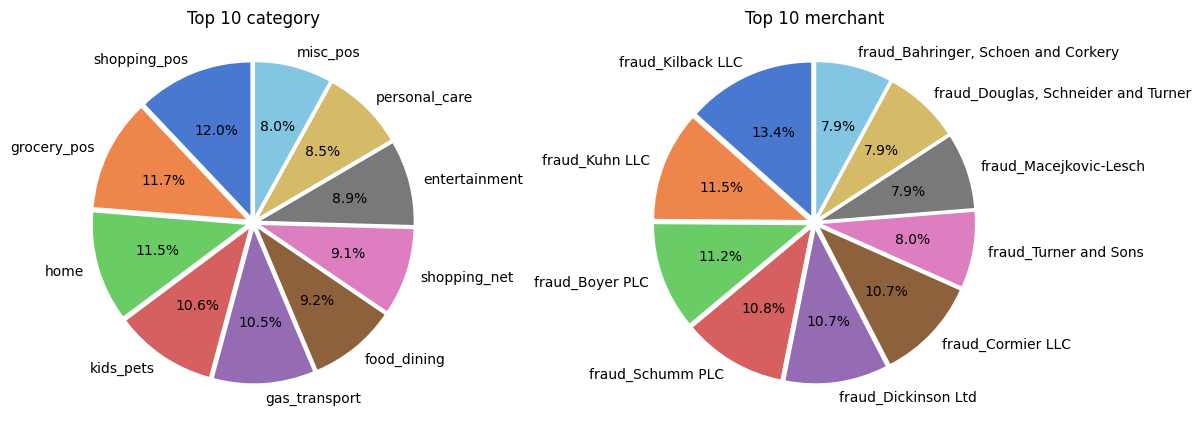

In [28]:
def plot_top_categories_pie_charts(columns, data=df, palette='muted'):
    plt.figure(figsize=(len(columns) * 6, 6))

    # Loop through each column and create a pie chart
    for i, column_name in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)

        # Get the top 10 categories based on frequency
        top_categories = data[column_name].value_counts().nlargest(10)

        # Plot the pie chart
        top_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette),
                                 startangle=90, explode=[0.05] * len(top_categories))

        plt.title(f'Top 10 {column_name}')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ['category', 'merchant']
plot_top_categories_pie_charts(columns_to_plot)

Insight: from the top 10 merchant, the fraudster attach the 2 of the top merchant, fraud_kilback_LLC and fraud_boyer_PLC, showing the fraudster sometime atttak the top merchants more.

grocery_pos has more fraudulent attach and being that it is one of the most spots where transactions were made

<Axes: xlabel='city'>

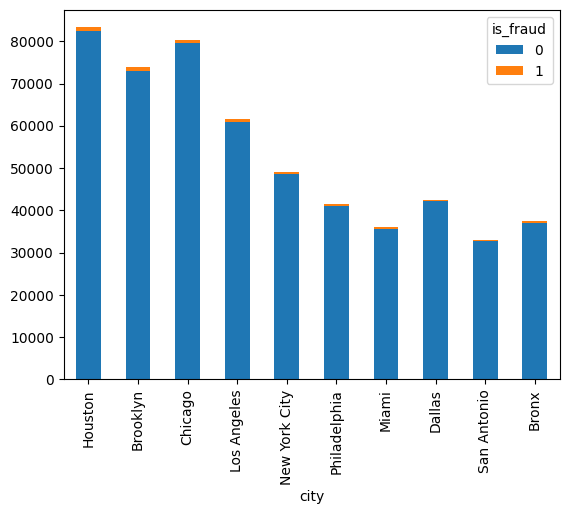

In [29]:
df.groupby('city')['is_fraud'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).plot(kind='bar', stacked=True)

fraud cases comes more from Houston, brooklyn and chicago, cities likeNavoo, essex junction has no cases

<Axes: xlabel='state'>

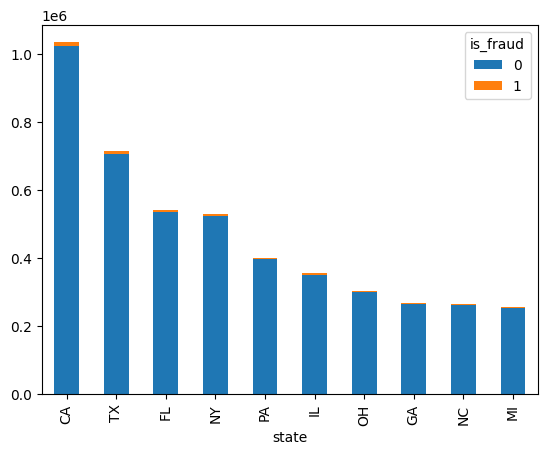

In [30]:
df.groupby('state')['is_fraud'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).plot(kind='bar', stacked=True)

Californian, Texas and Fl, are the top 3 states where the fradulent transaction come from

Number of high-value transactions (top 5%): 257404


,gender,city,state,lat,long,city_pop,job,trans_num,trans_date,trans_time,...,customer_avg_amount_7_day,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day,age
0,F,Rockford,IL,42.2786,-89.0361,189162,"Accountant, chartered management",1a91d07261b8e16242126081f37087f2,2023-01-28,13:02:02,...,18.27,6.97,4824.23,73065.81,141799.95,4,13,20,14,29
118,F,Palmdale,CA,34.4133,-118.0917,171170,Forensic scientist,298cd7d6b7795f3d7ba24b651d10a377,2022-10-09,17:18:31,...,37.55,3.24,927.88,28484.76,460522.39,5,6,21,49,21
140,F,Milwaukee,WI,42.9676,-88.0434,817312,"Scientist, clinical (histocompatibility and im...",7809604485346a331a43dbc7099e7c4b,2022-12-30,19:05:32,...,82.78,13.23,1722.55,19989.37,142942.64,6,8,15,17,49
200,M,Lincoln,NE,40.7848,-96.6431,266032,Operational researcher,3b01f9b168eb22d543b77bcb6233522b,2022-09-08,13:56:14,...,77.91,51.29,2754.10,88322.97,597733.87,6,8,17,42,39
244,M,Kemah,TX,29.5236,-95.0276,5790,English as a second language teacher,bf14aa1eba52e89418c6fd9e70b31b40,2022-10-30,23:15:01,...,17.16,4.49,3222.89,56543.53,317667.09,0,4,14,22,27


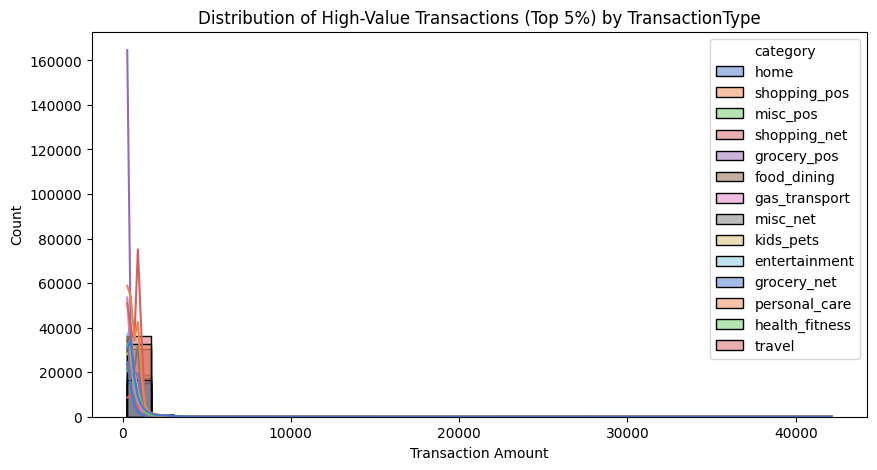

In [31]:
high_value_threshold = df['amt'].quantile(0.97)
high_value_transactions = df[df['amt'] > high_value_threshold]
print(f"Number of high-value transactions (top 5%): {len(high_value_transactions)}")
display(high_value_transactions.head())

# Plot high-value transactions
# Adding TransactionType as hue for high-value transactions
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='amt', bins=30, kde=True, hue='category', palette='muted')
plt.title('Distribution of High-Value Transactions (Top 5%) by TransactionType')
plt.xlabel('Transaction Amount')
plt.show()

In [32]:
df['unix_time'].value_counts().sort_values(ascending=False).head(5)

,count
unix_time,
1670616664,9
1672434051,8
1670696133,8
1658643519,8
1670771433,8


In [33]:
df[df['unix_time'] == 1670616664]

,gender,city,state,lat,long,city_pop,job,trans_num,trans_date,trans_time,...,customer_avg_amount_7_day,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day,age
405839,F,Allentown,PA,40.6018,-75.5225,166081,"Nurse, learning disability",f9d506c157c8e7aea7b49bc644d3e91d,2022-12-09,21:11:04,...,64.28,51.54,2648.84,82150.15,972843.03,1,6,12,39,34
605853,F,Cumming,GA,34.2037,-84.1031,129584,Clinical embryologist,a99712a11b811bbae4cb79222a57f86f,2022-12-09,21:11:04,...,59.00,42.55,3029.23,19075.10,107316.03,5,9,11,28,49
1289087,F,Milford,CT,41.2175,-73.0549,52759,Fish farm manager,8417f30b7ef696981ad484ba9f25601e,2022-12-09,21:11:04,...,87.42,33.16,1188.32,83603.90,588937.82,7,9,11,16,73
3368882,F,Muskego,WI,42.9047,-88.1214,24850,Trade union research officer,1bdf4010875fbdddbfe4681237c1e6cf,2022-12-09,21:11:04,...,30.01,58.77,548.12,75340.07,1025961.56,0,10,11,36,60
4236973,M,Saratoga,CA,37.2713,-122.0227,30617,Actor,22b178eeb73ca27e59d5a73b9ae2df82,2022-12-09,21:11:04,...,83.45,24.51,3127.88,22830.92,1026673.17,3,9,23,42,43
6661070,M,Philadelphia,PA,39.9597,-75.2024,1526206,Research scientist (life sciences),2789ed0237988723625393cfcc33ccf4,2022-12-09,21:11:04,...,72.67,69.32,1390.72,41533.83,647823.15,4,13,21,25,46
6968329,F,Fort Worth,TX,32.7392,-97.3852,813980,Architect,d349e659acb07c59c2f208e525c2dfbb,2022-12-09,21:11:04,...,2.14,43.40,3197.63,2085.07,799637.48,4,8,16,22,48
7647282,F,San Francisco,CA,37.7509,-122.4153,805301,Emergency planning/management officer,b396a1b776307b33de3b1dc62e1323a9,2022-12-09,21:11:04,...,66.44,69.55,3236.07,83420.61,221722.53,4,15,15,40,42
8217978,F,Olalla,WA,47.4241,-122.5745,4887,Mental health nurse,1b49051328a7f7109915e37ea7cb1e95,2022-12-09,21:11:04,...,79.09,50.36,3940.14,21845.99,74112.51,6,14,14,33,40


<Axes: xlabel='age'>

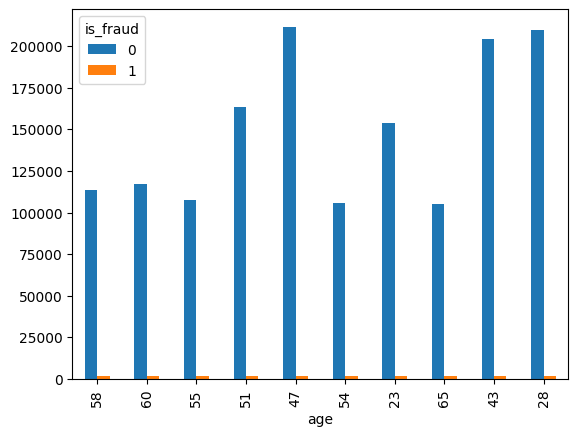

In [34]:
df.groupby('age')['is_fraud'].value_counts().unstack().sort_values(by=1, ascending=False).head(10).plot(kind='bar')

<ipython-input-35-58f49b53e1b6>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fraud_counts = df.groupby('age_group')['is_fraud'].value_counts().unstack().fillna(0)


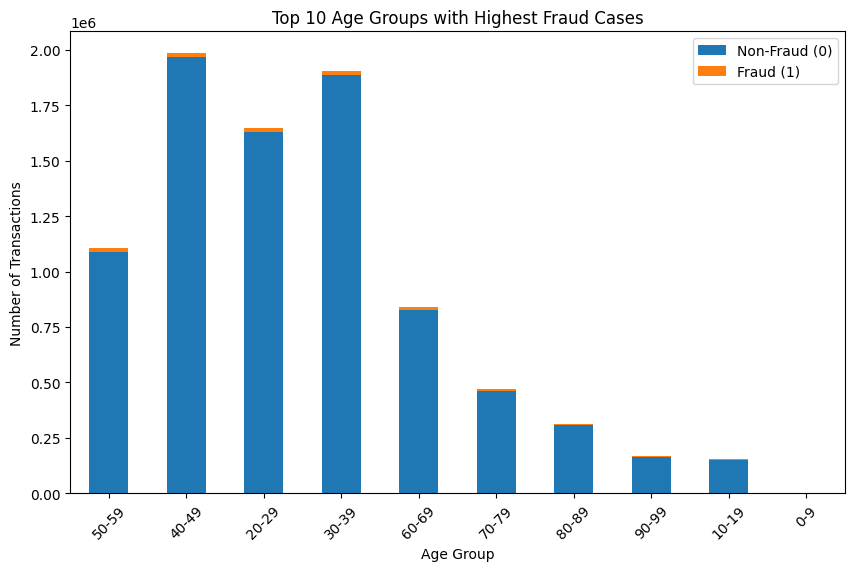

In [35]:
df['age_group'] = pd.cut(df['age'], bins=range(0, 101, 10), labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

# Group by age group and count fraud occurrences
age_fraud_counts = df.groupby('age_group')['is_fraud'].value_counts().unstack().fillna(0)

# Sort by fraud occurrences (1) in descending order and plot the top 10
age_fraud_counts.sort_values(by=1, ascending=False).head(10).plot(kind='bar', stacked=True, figsize=(10, 6))

# Plot enhancements
plt.title('Top 10 Age Groups with Highest Fraud Cases')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.legend(['Non-Fraud (0)', 'Fraud (1)'])
plt.xticks(rotation=45)
plt.show()

In [36]:
df[df['age']>70].value_counts()

gender  city      state  lat      long       city_pop  job                                  trans_num                         trans_date  trans_time  unix_time   category       amt     is_fraud  merchant                           customer_num_trans_1_day  customer_num_trans_7_day  customer_num_trans_30_day  trans_time_is_night  trans_time_day  trans_date_is_weekend  customer_avg_amout_1_day  customer_avg_amount_7_day  customer_avg_amount_30_day  merchant_num_trans_1_day  merchant_num_trans_7_day  merchant_num_trans_30_day  merchant_risk_1_day  merchant_risk_7_day  merchant_risk_30_day  merchant_risk_90_day  age  age_group
F       Aberdeen  MD     39.5109  -76.1805   21487     Buyer, industrial                    00c9949f8354a3453112288da3a33eff  2022-10-07  08:19:50    1665127190  shopping_pos   46.73   0         fraud_Beier-Hyatt                  1                         2                         7                          0                    4               0                      80.62                     89.78                      23.55                       1933.55                   93725.30                  194115.18                  7                    7                    9                     12                    90   80-89        1
M       Duluth    MN     46.7408  -92.1698   116688    Biomedical scientist                 6b956e3093b48ee1734e228c74db10d3  2022-08-28  04:18:22    1661656702  shopping_net   86.83   0         fraud_Rempel Inc                   3                         5                         15                         1                    6               1                      25.26                     5.67                       5.95                        301.49                    20675.27                  399666.61                  4                    10                   16                    13                    80   70-79        1
                                                                                            6d8c589a83dab8c3618eb9fc61c8986f  2022-08-14  00:10:27    1660432227  misc_pos       3.57    0         fraud_Maggio-Fahey                 5                         9                         14                         0                    6               1                      65.22                     14.70                      28.87                       1630.40                   40973.83                  132704.78                  0                    11                   23                    43                    80   70-79        1
                                                                                            6dbd175d467e2383f5a8afe4315c4e52  2022-10-13  02:41:08    1665625268  shopping_pos   74.68   0         fraud_Bins, Balistreri and Beatty  3                         5                         10                         0                    3               0                      57.34                     75.69                      40.93                       4754.59                   80612.85                  987784.04                  3                    3                    13                    29                    80   70-79        1
                                                                                            6e259ac43418cbfcc017194874259756  2022-08-08  09:03:53    1659945833  misc_pos       1.29    0         fraud_Buckridge PLC                3                         4                         11                         0                    0               0                      51.69                     5.35                       2.96                        990.09                    86687.91                  108827.02                  2                    8                    8                     18                    80   70-79        1
                                                                                                                                                                                                   

### KMeans Clustering

customer activity patterns and spending behaviour

In [37]:
# feat = ['customer_num_trans_1_day',
#        'customer_num_trans_7_day', 'customer_num_trans_30_day',
#        'customer_avg_amout_1_day', 'customer_avg_amount_7_day',
#        'customer_avg_amount_30_day', 'merchant_num_trans_1_day']

feat = ['amt', 'unix_time']

In [38]:
# Take a 10% sample of the dataset for analysis
df_sample = df.sample(frac=0.01, random_state=42)  # 10% of 8.5M rows = 850,000 rows


In [39]:
lbe = LabelEncoder()
df_sample['category'] = lbe.fit_transform(df_sample['category'])

In [40]:
df_sample[feat]

,amt,unix_time
1188742,154.63,1675451541
6836818,40.01,1667392179
619977,58.96,1652505953
6903713,65.53,1659634013
704435,130.68,1680361023
...,...,...
1602563,194.23,1655443152
699254,11.14,1655948266
764643,23.18,1673116477
4963420,4.78,1670621674


In [41]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sample[feat])


In [42]:
df_scaled

array([[ 0.4934011 ,  0.93059839],
       [-0.20382656,  0.03132778],
       [-0.08855467, -1.62969025],
       ...,
       [-0.3062026 ,  0.67004992],
       [-0.41812887,  0.39167764],
       [-0.27353716, -1.28512686]])

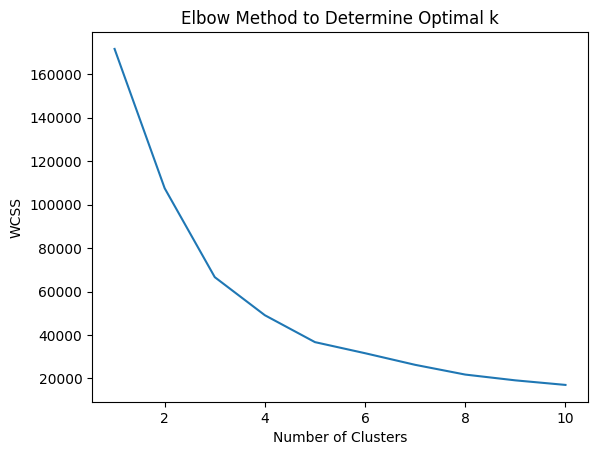

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


In [44]:
optimal_k = 3  # Example value, adjust based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df_sample['cluster'] = kmeans.fit_predict(df_scaled)

In [45]:
df_sample.head()

,gender,city,state,lat,long,city_pop,job,trans_num,trans_date,trans_time,...,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day,age,age_group,cluster
1188742,M,Antioch,CA,37.9939,-121.8089,102729,Retail buyer,de664aa991015d6fc7956d7c54070711,2023-02-03,20:12:21,...,1624.28,42130.90,1098957.16,0,7,19,20,32,30-39,0
6836818,F,Topeka,KS,38.9822,-95.7461,163415,"Administrator, charities/voluntary organisations",e0cbe86ceaaea2ba7a5d8b0619388d04,2022-11-02,13:29:39,...,3696.26,45235.76,21510.19,3,14,16,28,29,20-29,0
619977,M,Fairbury,IL,40.7450,-88.5165,4897,"Teacher, adult education",799be3a0d8fbefc320edd719a8f4de2b,2022-05-14,06:25:53,...,805.29,63986.51,67147.94,2,4,22,23,43,40-49,1
6903713,F,Oklahoma City,OK,35.4834,-97.6299,640470,Commercial horticulturist,5171b5fa3bb69454fd4d8d51b0b1cb6e,2022-08-04,18:26:53,...,1139.19,27978.81,1048559.90,0,0,19,9,23,20-29,1
704435,F,San Diego,CA,32.7466,-117.1636,1241364,Media planner,45b2c3f17f4bb8835e6873a80ff5bf38,2023-04-01,15:57:03,...,2088.98,93460.25,428569.80,3,6,18,8,48,40-49,0


In [46]:
kmeans.cluster_centers_

array([[-0.12216786,  0.83325168],
       [-0.03607616, -0.89444145],
       [ 6.03283152,  0.09534478]])

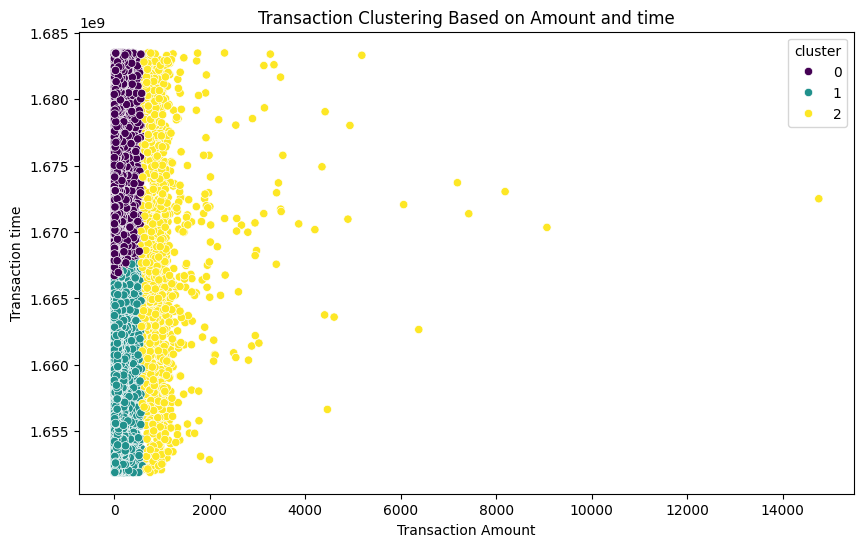

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_sample['amt'], y=df_sample['unix_time'], hue=df_sample['cluster'], palette='viridis')
plt.title('Transaction Clustering Based on Amount and time')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction time')
plt.show()

In [48]:
## Fit K-means with the chosen number of clusters (k=2)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_scaled)

# Assign clusters and calculate distance to cluster centroid
df_sample['Cluster'] = kmeans.labels_
df_sample['DistanceToCentroid'] = np.linalg.norm(df_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Identify potential frauds based on distance threshold
threshold = df_sample['DistanceToCentroid'].quantile(0.97)
potential_frauds = df_sample[df_sample['DistanceToCentroid'] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds)

Number of potential frauds detected: 2575


,gender,city,state,lat,long,city_pop,job,trans_num,trans_date,trans_time,...,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day,age,age_group,cluster,Cluster,DistanceToCentroid
6526077,F,Ocala,FL,29.2611,-82.2195,207224,Engineering geologist,b344905d59d584dd19d25027a81c2462,2022-12-24,12:36:07,...,1094476.40,2,10,20,43,21,20-29,2,3,1.784155
4769050,F,Atlanta,GA,33.6053,-84.4813,900273,Soil scientist,7bae2fb8ce681d6fde10d7ef2e104bb2,2022-12-24,18:01:23,...,127310.19,2,9,20,49,30,20-29,2,3,1.466576
348416,F,Avon,IN,39.7629,-86.3996,31754,Waste management officer,3079711aa708221bdb6f3d5c7d22796b,2023-02-22,14:53:11,...,729862.97,6,6,18,27,47,40-49,0,2,1.868369
2602432,F,Tucson,AZ,32.1422,-111.0506,865276,Psychiatric nurse,7bfc9313718c34c001c3f5ec9c4e5100,2023-04-14,20:08:25,...,927371.58,4,15,19,22,39,30-39,2,3,2.206669
1538472,M,Minot,ND,48.2291,-101.2985,48273,Horticultural therapist,bfe974d4b1ac7964ae9eaf0f436bfe13,2022-12-16,15:40:34,...,977620.80,4,10,16,19,44,40-49,0,0,1.610679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6664649,F,Lanai City,HI,20.8293,-156.9210,3135,"Optician, dispensing",19cc6bd36ea0b966718bb9a27538e001,2022-11-25,04:51:24,...,227781.83,0,10,15,34,64,60-69,0,0,1.337846
1421431,F,Albany,NY,42.7003,-73.8575,151022,"Geologist, engineering",deab6575de59735c3a5f76395dfa294c,2023-05-06,17:16:10,...,564710.29,3,11,21,24,34,30-39,0,2,3.098333
1780962,M,Somerville,TN,35.2772,-89.3918,10941,Commercial art gallery manager,181a332d4759b91092b1b6d0b67621fa,2022-08-28,09:28:07,...,872444.89,1,3,14,4,95,90-99,2,3,2.111864
1826933,M,Bartlett,IL,41.9794,-88.2063,41928,Insurance underwriter,a6850134f3458506e873e960e7ad3a54,2022-09-11,11:22:01,...,864475.37,0,15,15,25,56,50-59,2,3,3.070699


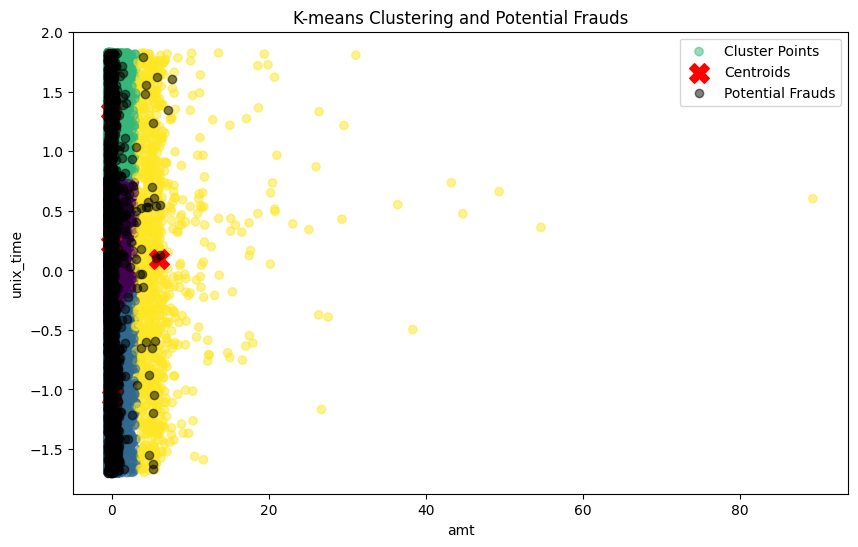

In [49]:
plt.figure(figsize=(10, 6))

# Plotting clusters
scatter = plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Cluster Points')

# Plotting cluster centroids
centroids = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Plotting potential frauds
# Get the indices of potential frauds within df_sample
fraud_indices_in_df_sample = potential_frauds.index.get_indexer(potential_frauds.index)

#Filter df_scaled using fraud_indices_in_df_sample
frauds = plt.scatter(df_scaled[fraud_indices_in_df_sample, 0], df_scaled[fraud_indices_in_df_sample, 1], c='black', alpha=0.5, label='Potential Frauds', edgecolors='k')


plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.title('K-means Clustering and Potential Frauds')
plt.legend(loc='upper right')
plt.show()

DBSCAN

In [50]:
label_mapping = {
    -1: 'Fraud (Outliers)',  # Default noise label for DBSCAN
    0: 'Normal',
    1: 'Suspicious Group 1',
    2: 'Suspicious Group 2',
    3: 'Suspicious Group 3',
    4: 'Suspicious Group 4',
}

# Select relevant features for DBSCAN
features = ['amt', 'category', 'unix_time']
X = df_sample[features].copy()

# X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(X_scaled)

# Add labels to the dataframe
df_sample['DBSCAN_Cluster'] = dbscan.labels_

# Map cluster labels to descriptive names
df_sample['Cluster_Description'] = df_sample['DBSCAN_Cluster'].map(label_mapping)

# Identify outliers (noise points) labeled as -1
potential_frauds = df_sample[df_sample['DBSCAN_Cluster'] == -1]
print(f"Number of potential frauds detected by DBSCAN: {len(potential_frauds)}")
display(potential_frauds.head())

Number of potential frauds detected by DBSCAN: 32


,gender,city,state,lat,long,city_pop,job,trans_num,trans_date,trans_time,...,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day,age,age_group,cluster,Cluster,DistanceToCentroid,DBSCAN_Cluster,Cluster_Description
5468687,M,Norton,MA,41.9718,-71.1894,19031,Purchasing manager,706b0fe18e2c37fe4c040ab1bcee6a90,2022-08-19,12:08:31,...,3,14,13,33,30-39,2,3,8.754240,-1,Fraud (Outliers)
5636683,M,Vernonia,OR,45.8573,-123.1967,3464,Immigration officer,d01ecca450805c473ac99755b308ce52,2022-09-08,18:31:57,...,4,15,37,33,30-39,2,3,32.312485,-1,Fraud (Outliers)
7356081,M,Nicholson,PA,41.6412,-75.7641,3733,"Research officer, political party",696bb13a8236aee393a056550826919d,2022-09-03,12:07:16,...,10,16,39,32,30-39,2,3,11.495127,-1,Fraud (Outliers)
5692086,M,Sale Creek,TN,35.3858,-85.1023,3074,"Development worker, international aid",14f5c7e8c6031d3c31e590fc6e6f21c0,2022-12-18,16:37:17,...,5,20,15,43,40-49,2,3,38.678938,-1,Fraud (Outliers)
5961917,M,Lincolnville,ME,44.3048,-69.0824,3684,Therapeutic radiographer,5593890ea45b2651d05d02cee752f3c6,2022-09-21,12:37:00,...,11,18,18,27,20-29,2,3,20.317013,-1,Fraud (Outliers)


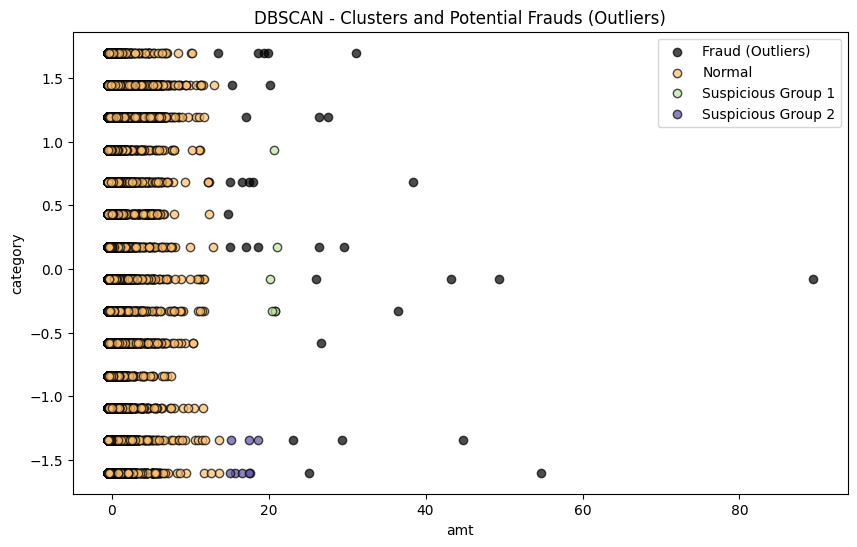

In [51]:
# Visualize clusters and potential frauds
plt.figure(figsize=(10, 6))
unique_labels = np.unique(dbscan.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise (outliers)
        col = [0, 0, 0, 1]
    class_member_mask = (dbscan.labels_ == k)
    xy = X_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=tuple(col), edgecolor='k', alpha=0.7, label=label_mapping.get(k, f'Cluster {k}'))

plt.title('DBSCAN - Clusters and Potential Frauds (Outliers)')
plt.xlabel(features[0])  # TransactionAmount
plt.ylabel(features[1])  # TransactionDuration
plt.legend()
plt.show()

### Fraud prediction

In [52]:
df_sample = df.sample(frac=0.1, random_state=42)  # 10% of 8.5M rows = 850,000 rows

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580255 entries, 0 to 8580254
Data columns (total 33 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   gender                      object        
 1   city                        object        
 2   state                       object        
 3   lat                         float64       
 4   long                        float64       
 5   city_pop                    int64         
 6   job                         object        
 7   trans_num                   object        
 8   trans_date                  datetime64[ns]
 9   trans_time                  object        
 10  unix_time                   int64         
 11  category                    object        
 12  amt                         float64       
 13  is_fraud                    int64         
 14  merchant                    object        
 15  customer_num_trans_1_day    int64         
 16  customer_num_trans

In [54]:
df_sample = df_sample.drop(columns=['age_group','trans_num', 'trans_time', 'trans_date'])


In [55]:
num_col = df_sample.select_dtypes(exclude='object').columns
cat_col = df_sample.select_dtypes(include='object').columns

In [56]:
df_sample[cat_col].nunique()

,0
gender,2
city,3612
state,51
job,639
category,14
merchant,693


In [57]:
# df_encoded.head()

In [58]:
df_sample_real = df_sample.copy()

In [59]:
ohe = OneHotEncoder(sparse_output=False, drop='if_binary', handle_unknown='ignore')  # or '

# Reshape the 'gender' column to a 2D array using reshape(-1, 1)
df_encoded = pd.DataFrame(ohe.fit_transform(df_sample[['gender']]),
                          columns=ohe.get_feature_names_out(['gender']))
df_sample = pd.concat([df_sample.reset_index(drop=True), df_encoded], axis=1)
df_sample.drop(columns='gender', inplace=True)

In [60]:
# cat_col = df_sample.select_dtypes(include='object').columns
# num_col = df_sample.select_dtypes(exclude='object').columns
cat_col

Index(['gender', 'city', 'state', 'job', 'category', 'merchant'], dtype='object')

In [61]:
# label encode all the other categories

label = LabelEncoder()
for col in cat_col[1:]:
  df_sample[col] = label.fit_transform(df_sample[col])


splitting

In [62]:
X = df_sample.drop(columns='is_fraud')
y = df_sample['is_fraud']

In [63]:
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.columns

Index(['city', 'state', 'lat', 'long', 'city_pop', 'job', 'unix_time',
       'category', 'amt', 'merchant', 'customer_num_trans_1_day',
       'customer_num_trans_7_day', 'customer_num_trans_30_day',
       'trans_time_is_night', 'trans_time_day', 'trans_date_is_weekend',
       'customer_avg_amout_1_day', 'customer_avg_amount_7_day',
       'customer_avg_amount_30_day', 'merchant_num_trans_1_day',
       'merchant_num_trans_7_day', 'merchant_num_trans_30_day',
       'merchant_risk_1_day', 'merchant_risk_7_day', 'merchant_risk_30_day',
       'merchant_risk_90_day', 'age', 'gender_M'],
      dtype='object')

In [65]:
# scaling of all features except the gender

scaler = StandardScaler()
X_train[X_train.columns[:-1]] = scaler.fit_transform(X_train[X_train.columns[:-1]])
X_test[X_test.columns[:-1]] = scaler.transform(X_test[X_test.columns[:-1]])

In [66]:
X_train

,city,state,lat,long,city_pop,job,unix_time,category,amt,merchant,...,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day,age,gender_M
354878,0.876667,0.749088,0.543885,0.492616,-0.516168,-1.427100,1.469101,0.935000,-0.413469,-0.003299,...,-0.517229,1.479579,-0.301011,-0.095822,0.216244,0.715392,1.224275,-0.705433,1.885164,0.0
354132,0.573290,-0.991728,-1.560295,0.598051,-0.149079,-0.512922,0.139909,1.442061,-0.377464,-0.594392,...,-0.025572,0.260261,1.079175,0.938202,1.525470,-0.067536,0.598315,-0.868703,-1.415727,0.0
606786,0.973284,-0.255229,0.307639,0.904407,-0.285864,-0.686021,0.299817,-1.346775,-0.284888,-1.190453,...,1.116437,1.313202,-0.682859,-1.256219,1.525470,-0.328512,1.224275,-0.868703,1.773270,0.0
678401,-0.282737,-0.322183,0.894859,1.239824,-0.508306,1.434439,1.063815,0.174408,-0.372695,-1.101044,...,-1.037009,1.701186,-0.812867,0.868560,0.652652,0.976368,-0.444952,0.845626,0.486481,1.0
173196,1.693081,-0.523047,0.062824,-0.306819,0.212145,-0.118041,-1.128341,-0.586183,-0.278987,-1.647432,...,0.246119,-1.380033,1.604642,0.150608,-0.656574,-0.067536,1.015622,0.763992,-0.800307,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.288270,1.217769,-0.288608,0.204567,-0.497225,0.249794,0.388771,-1.346775,-0.257408,0.369239,...,0.300357,1.250660,0.437581,0.423283,-1.529391,1.498319,-0.236299,-0.705433,1.437586,0.0
365838,1.062172,-1.326501,-0.853444,-1.498862,1.696261,-0.069357,-0.478236,1.188530,-0.422053,-1.553056,...,1.466473,-0.076084,0.696298,-0.403334,-0.656574,-0.589488,-1.696873,-0.378894,-0.352728,0.0
131932,-0.335876,0.682134,0.634472,1.120540,-0.448274,1.212656,1.641130,0.935000,-0.389148,1.094446,...,1.114429,-1.082230,0.480675,-1.615258,0.652652,-0.328512,-0.653605,1.661974,-0.296781,1.0
671155,-0.399644,0.949951,0.540928,0.923555,-0.223484,-0.691430,1.690126,1.695591,-0.247870,-0.996733,...,0.209961,-0.049866,0.288712,-1.731863,1.525470,0.193440,0.806969,0.355818,2.388690,1.0


In [67]:

def model_build(models, X_train, y_train, X_test, y_test):
    results = {}
    for model in models:
        # Fit the model
        clf = model.fit(X_train, y_train)

        # Predict the training set
        y_train_pred = clf.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)

        # Predict the test set
        y_test_pred = clf.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Store both accuracies in the results dictionary
        results[type(model).__name__] = {
            "train_accuracy": train_accuracy,
            "test_accuracy": test_accuracy
        }

        print(f"{type(model).__name__}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

    return results


In [68]:
model = [LogisticRegression(), GradientBoostingClassifier()]

result = model_build(model, X_train, y_train, X_test, y_test)

LogisticRegression: Train Accuracy = 0.9876, Test Accuracy = 0.9879
GradientBoostingClassifier: Train Accuracy = 0.9958, Test Accuracy = 0.9959


In [69]:
result

{'LogisticRegression': {'train_accuracy': 0.9875644649048687,
  'test_accuracy': 0.9878908662867266},
 'GradientBoostingClassifier': {'train_accuracy': 0.9958072317240174,
  'test_accuracy': 0.9959325431511719}}

In [70]:
from sklearn.metrics import roc_auc_score, roc_curve
# import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    if len(set(y_test)) == 2:  # Binary classification check
        y_test_prob = model.predict_proba(X_test)[:, 1]  # Get probability of positive class

        auc_score = roc_auc_score(y_test, y_test_prob)
        fpr, tpr, _ = roc_curve(y_test, y_test_prob)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {auc_score:.4f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC AUC Curve')
        plt.legend()
        plt.show()

        return auc_score
    else:
        print("ROC AUC can only be calculated for binary classification.")
        return None


In [71]:
model[1]

GradientBoostingClassifier()

In [72]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    # clf = model.fit(X_train, y_train)

    # Predict the training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Classification report for test set
    class_report = classification_report(y_test, y_test_pred, output_dict=True)

    results = {
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "classification_report": class_report
    }

    return model, results

LogisticRegression:
  Train Accuracy: 0.9876
  Test Accuracy: 0.9879
  Classification Report: {'0': {'precision': 0.9893202297026005, 'recall': 0.9985392000942451, 'f1-score': 0.9939083377794454, 'support': 169770.0}, '1': {'precision': 0.023622047244094488, 'recall': 0.0032679738562091504, 'f1-score': 0.005741626794258373, 'support': 1836.0}, 'accuracy': 0.9878908662867266, 'macro avg': {'precision': 0.5064711384733475, 'recall': 0.5009035869752272, 'f1-score': 0.4998249822868519, 'support': 171606.0}, 'weighted avg': {'precision': 0.9789882957201417, 'recall': 0.9878908662867266, 'f1-score': 0.9833360146592235, 'support': 171606.0}}


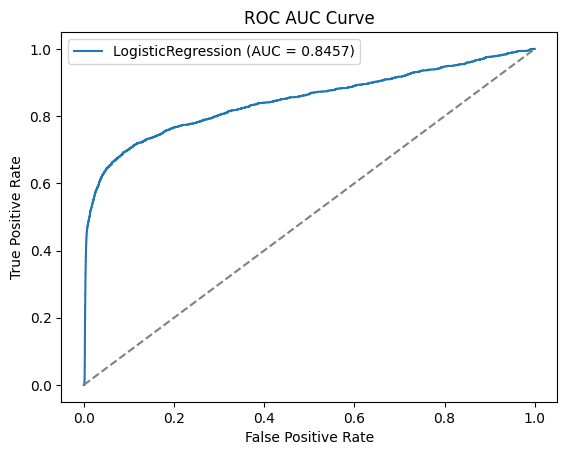

  ROC AUC Score: 0.8457


In [73]:

trained_model, results = evaluate_model(model[0], X_train, y_train, X_test, y_test)
print(f"{type(model[0]).__name__}:")
print(f"  Train Accuracy: {results['train_accuracy']:.4f}")
print(f"  Test Accuracy: {results['test_accuracy']:.4f}")
print(f"  Classification Report: {results['classification_report']}")

# Plot ROC curve for binary classification
auc_score = plot_roc_curve(trained_model, X_test, y_test)
if auc_score:
    print(f"  ROC AUC Score: {auc_score:.4f}")

GradientBoostingClassifier:
  Train Accuracy: 0.9958
  Test Accuracy: 0.9959
  Classification Report: {'0': {'precision': 0.9964120873313211, 'recall': 0.9994875419685457, 'f1-score': 0.9979474451867884, 'support': 169770.0}, '1': {'precision': 0.9336890243902439, 'recall': 0.6672113289760349, 'f1-score': 0.7782719186785261, 'support': 1836.0}, 'accuracy': 0.9959325431511719, 'macro avg': {'precision': 0.9650505558607825, 'recall': 0.8333494354722903, 'f1-score': 0.8881096819326573, 'support': 171606.0}, 'weighted avg': {'precision': 0.9957410178841002, 'recall': 0.9959325431511719, 'f1-score': 0.9955971528504529, 'support': 171606.0}}


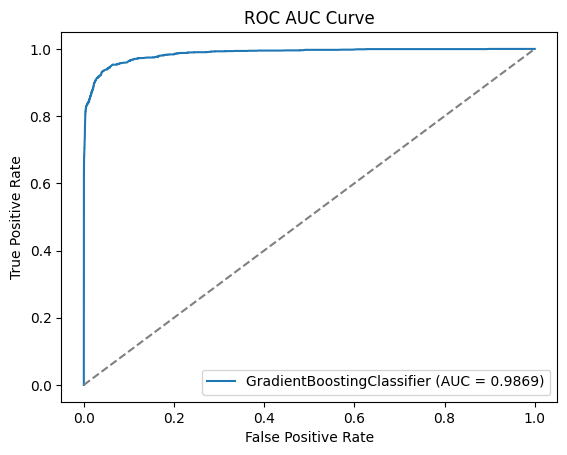

  ROC AUC Score: 0.9869


In [74]:

trained_model, results = evaluate_model(model[1], X_train, y_train, X_test, y_test)
print(f"{type(model[1]).__name__}:")
print(f"  Train Accuracy: {results['train_accuracy']:.4f}")
print(f"  Test Accuracy: {results['test_accuracy']:.4f}")
print(f"  Classification Report: {results['classification_report']}")

# Plot ROC curve for binary classification
auc_score = plot_roc_curve(trained_model, X_test, y_test)
if auc_score:
    print(f"  ROC AUC Score: {auc_score:.4f}")

Confusion matrix:since i prefer the gradient boosting as the best model, then let's work on it further

In [75]:
y_train_pred = model[1].predict(X_train)
y_test_pred = model[1].predict(X_test)

In [76]:
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_train

array([[678516,    357],
       [  2521,   5026]])

In [77]:
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
conf_matrix_test

array([[169683,     87],
       [   611,   1225]])

Let's do grid search and let's see wht turns out

In [78]:
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [79]:
k = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [80]:
grid_params = {
    'n_estimators': [100, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1]
}

In [81]:
# gridsearch = GridSearchCV(estimator=model[1], param_grid=grid_params, cv=k, scoring='accuracy', n_jobs=-1)
# gridsearch.fit(X_train, y_train)

In [82]:
# gridsearch.best_params_

Explanation

In [83]:
!pip install --upgrade shap==0.44.1 -q
import shap
shap.initjs()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.8/535.8 kB 9.6 MB/s eta 0:00:00


In [84]:
# y_test[y_test == 1].index

In [85]:
df_sample[df_sample.index == 76906]['is_fraud']

,is_fraud
76906,1


In [86]:
X_test[X_test.index == 76906]

,city,state,lat,long,city_pop,job,unix_time,category,amt,merchant,...,customer_avg_amount_30_day,merchant_num_trans_1_day,merchant_num_trans_7_day,merchant_num_trans_30_day,merchant_risk_1_day,merchant_risk_7_day,merchant_risk_30_day,merchant_risk_90_day,age,gender_M


In [87]:

explainer = shap.Explainer(model[1], X_train)
explainer

In [88]:
explanations = explainer(X_test
                         , check_additivity=False)

 99%|===================| 169931/171606 [01:25<00:00]       

In [89]:
explanations.shape


(171606, 28)

In [90]:
shap_values = explanations

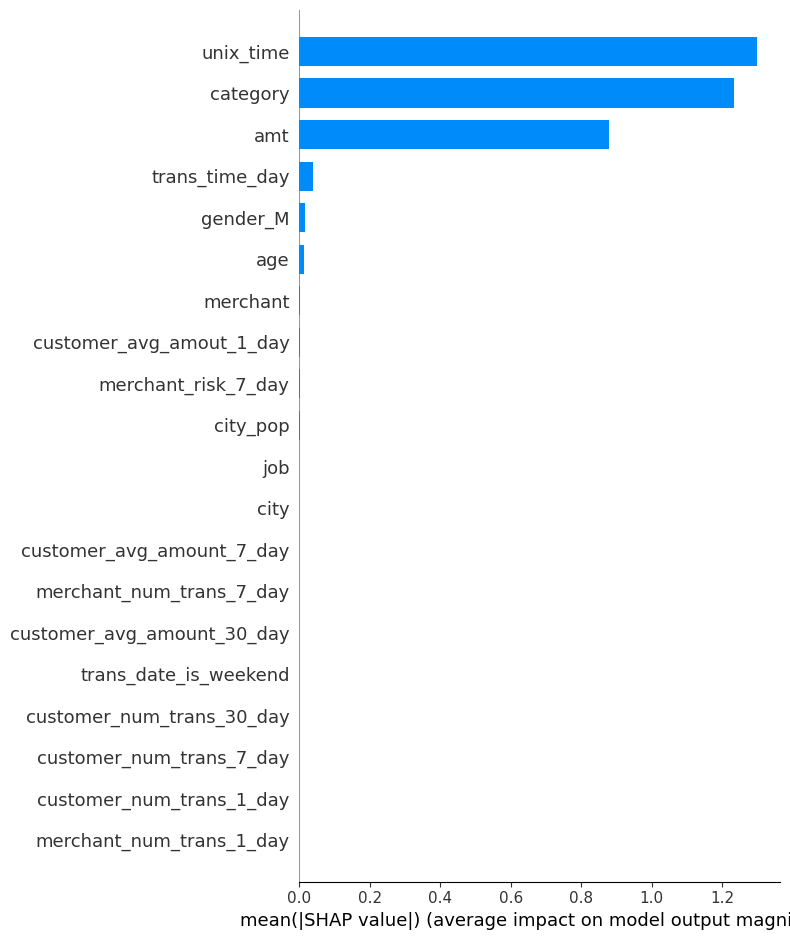

In [91]:
shap.summary_plot(explanations.values, X_train, feature_names=X_train.columns, plot_type="bar")


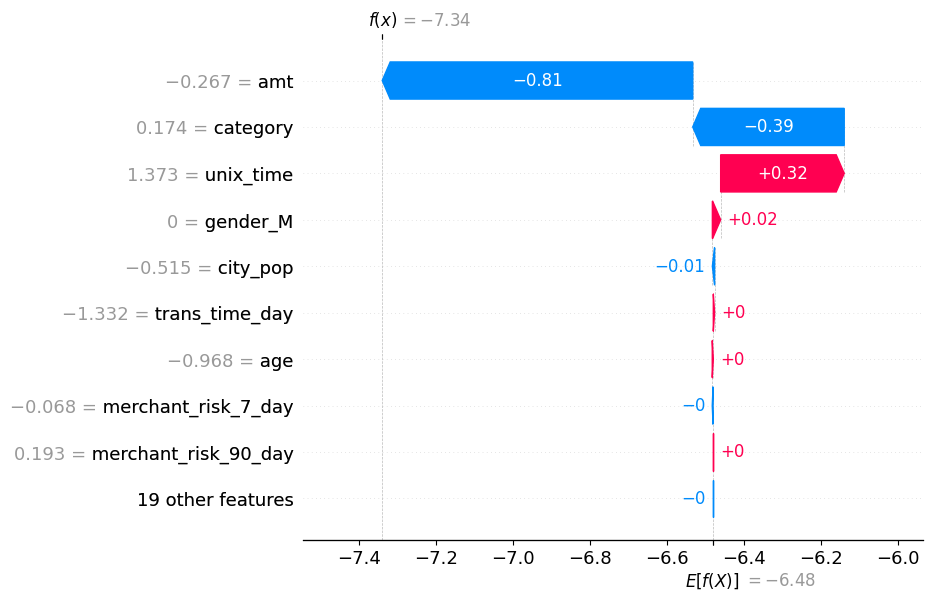

In [92]:
shap.plots.waterfall(shap_values[1])


In [93]:
# converting log_odds to probability
# if it is less than 0.5, then it belongs to 0, and if above it is equal to 1

log_odds = -7.109
probability = 1 / (1 + np.exp(-log_odds))
print(f"Predicted Probability: {probability:.4f}")

Predicted Probability: 0.0008


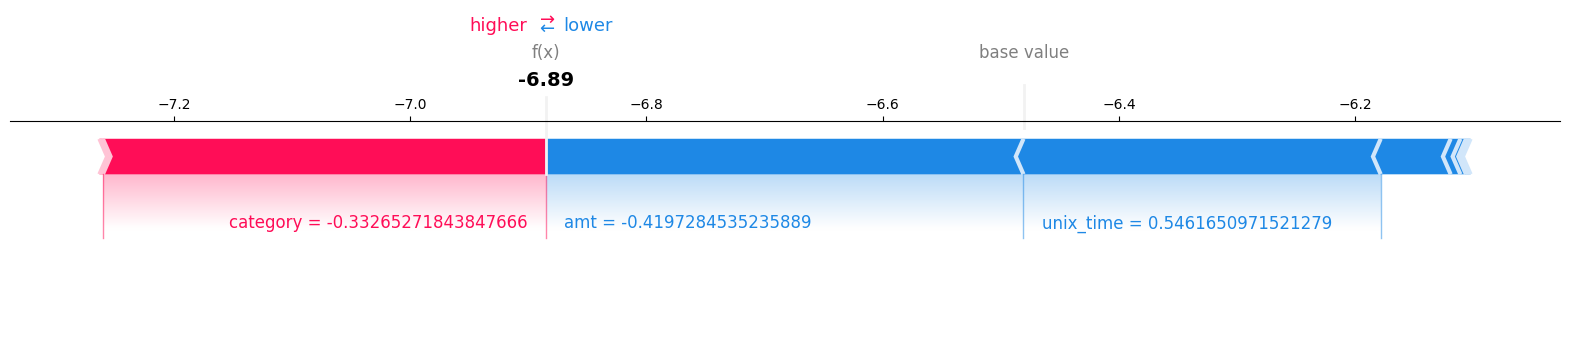

In [94]:
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0], matplotlib=True)


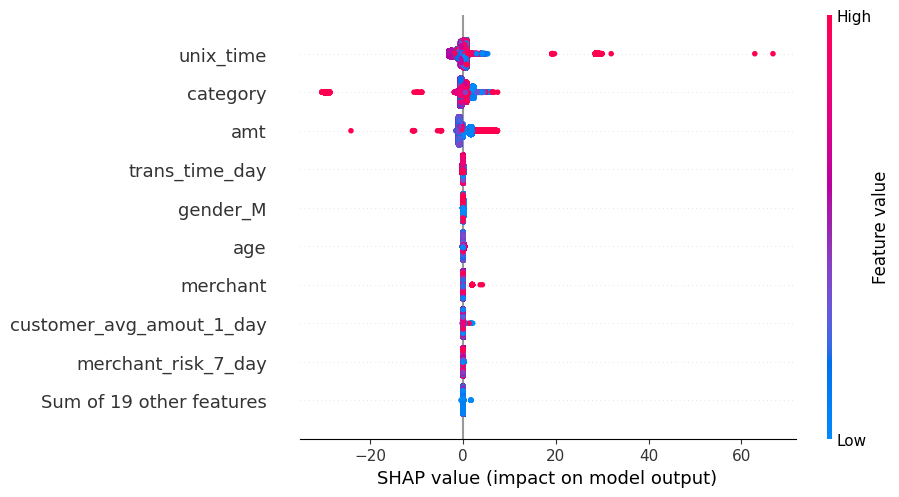

In [95]:
shap.plots.beeswarm(shap_values)


In [96]:
# shap.plots.scatter(shap_values[:, 'amt'], color=shap_values[:,"category"])
